In [22]:
import pandas as pd
from matplotlib import pyplot as plt
from toolz.functoolz import pipe
import os 

In [23]:
%run -i "preprocess_lang.ipynb"
%run -i "preprocess_nolang.ipynb"

In [24]:
df = pd.DataFrame()

for json_file in os.listdir('dataset/jsonl'):
    df = pd.concat([df, pd.read_json('dataset/jsonl/' + json_file, lines=True)], ignore_index=True)
    print(f"Added {json_file} to dataframe")

Added af-ZA.jsonl to dataframe
Added am-ET.jsonl to dataframe
Added ar-SA.jsonl to dataframe
Added az-AZ.jsonl to dataframe
Added bn-BD.jsonl to dataframe
Added cy-GB.jsonl to dataframe
Added da-DK.jsonl to dataframe
Added de-DE.jsonl to dataframe
Added el-GR.jsonl to dataframe
Added en-US.jsonl to dataframe
Added es-ES.jsonl to dataframe
Added fa-IR.jsonl to dataframe
Added fi-FI.jsonl to dataframe
Added fr-FR.jsonl to dataframe
Added he-IL.jsonl to dataframe
Added hi-IN.jsonl to dataframe
Added hu-HU.jsonl to dataframe
Added hy-AM.jsonl to dataframe
Added id-ID.jsonl to dataframe
Added is-IS.jsonl to dataframe
Added it-IT.jsonl to dataframe
Added ja-JP.jsonl to dataframe
Added jv-ID.jsonl to dataframe
Added ka-GE.jsonl to dataframe
Added km-KH.jsonl to dataframe
Added kn-IN.jsonl to dataframe
Added ko-KR.jsonl to dataframe
Added lv-LV.jsonl to dataframe
Added ml-IN.jsonl to dataframe
Added mn-MN.jsonl to dataframe
Added ms-MY.jsonl to dataframe
Added my-MM.jsonl to dataframe
Added nb

In [25]:
df = df[df['locale'] == 'en-US']

In [26]:
df = pipe(df, remove_punctuation, lowercase, tokenize)

In [27]:
df['utt'] = df['utt'].apply(lambda x: " ".join(x))

In [28]:
df["locale"] = df["locale"].apply(lambda x: x.split("-")[0])

In [29]:
df.head()

,id,locale,partition,scenario,intent,utt,annot_utt,worker_id,slot_method,judgments,utt_text
148689,0,en,test,alarm,alarm_set,wake me up at five am this week,wake me up at [time : five am] [date : this week],1,NaN,NaN,"(w, a, k, e, , m, e, , u, p, , a, t, , f, ..."
148690,1,en,train,alarm,alarm_set,wake me up at nine am on friday,wake me up at [time : nine am] on [date : friday],1,NaN,NaN,"(w, a, k, e, , m, e, , u, p, , a, t, , n, ..."
148691,2,en,train,alarm,alarm_set,set an alarm for two hours from now,set an alarm for [time : two hours from now],1,NaN,NaN,"(s, e, t, , a, n, , a, l, a, r, m, , f, o, ..."
148692,3,en,test,audio,audio_volume_mute,quiet,quiet,1,NaN,NaN,"(q, u, i, e, t)"
148693,4,en,train,audio,audio_volume_mute,olly quiet,olly quiet,1,NaN,NaN,"(o, l, l, y, , q, u, i, e, t)"


In [30]:
def get_corpus(df):
    return df["utt"].tolist()


get_corpus(df)

['wake me up at five am this week',
 'wake me up at nine am on friday',
 'set an alarm for two hours from now',
 'quiet',
 'olly quiet',
 'stop',
 'olly pause for ten seconds',
 'pause for ten seconds',
 'pink is all we need',
 'make the lighting bit more warm here',
 'please set the lighting suitable for reading',
 'turn the lights off please',
 'time to sleep',
 'time to sleep olly',
 'and the darkness has fallen',
 'turn off the light in the bathroom',
 'olly dim the lights in the hall',
 'dim the lights in the hall',
 'turn the lights off in the bedroom',
 'olly turn the lights off in the bedroom',
 'set lights to twenty percent',
 'olly set lights to twenty percent',
 'dim the lights in the kitchen olly',
 'dim the lights in the kitchen',
 'make a room darker',
 'olly clean the flat',
 'clean the flat',
 'its dirty here make some noise',
 'vacuum the house',
 'vacuum the house olly',
 'cleaning is good dust is so bad do now your magic clean my carpet',
 'hoover the hallway',
 'hoo

In [31]:
print("Scenarios:")
print(df["scenario"].unique())

print("\nIntents:")
print(df["intent"].unique())

Scenarios:
['alarm' 'audio' 'iot' 'calendar' 'play' 'general' 'datetime' 'takeaway'
 'news' 'music' 'weather' 'qa' 'social' 'recommendation' 'cooking'
 'transport' 'email' 'lists']

Intents:
['alarm_set' 'audio_volume_mute' 'iot_hue_lightchange' 'iot_hue_lightoff'
 'iot_hue_lighton' 'iot_hue_lightdim' 'iot_cleaning' 'calendar_query'
 'play_music' 'general_quirky' 'general_greet' 'datetime_query'
 'datetime_convert' 'takeaway_query' 'alarm_remove' 'alarm_query'
 'news_query' 'music_likeness' 'music_query' 'iot_hue_lightup'
 'takeaway_order' 'weather_query' 'music_settings' 'audio_volume_down'
 'general_joke' 'music_dislikeness' 'audio_volume_other' 'iot_coffee'
 'audio_volume_up' 'iot_wemo_on' 'iot_wemo_off' 'qa_stock' 'play_radio'
 'social_post' 'recommendation_locations' 'cooking_recipe' 'qa_factoid'
 'recommendation_events' 'calendar_set' 'play_audiobook' 'play_podcasts'
 'social_query' 'transport_query' 'email_sendemail' 'transport_ticket'
 'recommendation_movies' 'lists_query' 'pla

In [11]:
fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_dpi(800)

ax.bar(df["scenario"].unique(), df["scenario"].value_counts(), color="#9179FA")
ax.set_title("Scenario Distribution")
ax.set_xlabel("Scenario")
ax.set_ylabel("Count")

plt.style.use("dark_background")
plt.xticks(rotation=90)
plt.show()

In [10]:
fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_dpi(800)

ax.bar(df["intent"].unique(), df["intent"].value_counts(), color="#9179FA")
ax.set_title("Intent Distribution")
ax.set_xlabel("Intent")
ax.set_ylabel("Count")

plt.style.use("dark_background")
plt.xticks(rotation=90)
plt.show()

In [58]:

from wordcloud import WordCloud


def create_word_cloud(contents):
    wordclouds = [WordCloud().generate(" ".join(content)) for content in contents]
    
    fig = plt.figure(figsize=(6 * len(contents), 6))
    for i,content in enumerate(contents):
        ax = fig.add_subplot(1, len(contents), i+1)
        ax.imshow(wordclouds[i])
        ax.axis("off")
        
    plt.show()

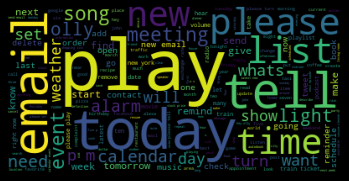

In [59]:
create_word_cloud([get_corpus(df)])

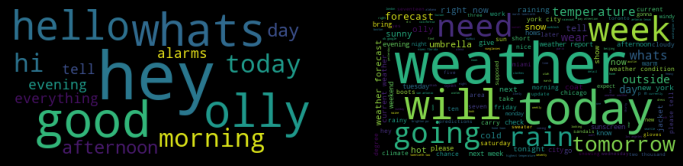

In [60]:
# for MultinomialNB and according to confusion matrix for en
#   - general_greet -> weather_query
#   - music_dislikeness/music_settings -> play_music
#  were intents often misclassified

create_word_cloud([
    get_corpus(df[df["intent"] == "general_greet"]),
    get_corpus(df[df["intent"] == "weather_query"])
])

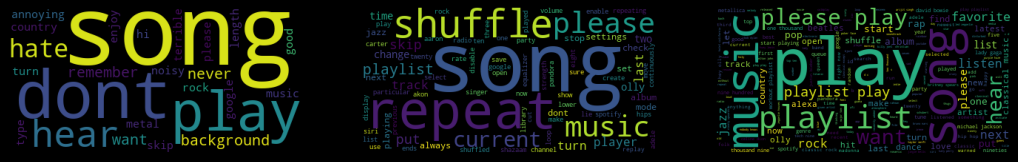

In [61]:
create_word_cloud([
    get_corpus(df[df["intent"] == "music_dislikeness"]),
    get_corpus(df[df["intent"] == "music_settings"]),
    get_corpus(df[df["intent"] == "play_music"])
])